In [29]:
%matplotlib inline
import seaborn
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import math
token="Us3wFmXGgAj_1cUtHAAR"

import pylab
pylab.rcParams['figure.figsize'] = (12, 8)

In [4]:
treas = quandl.get("CHRIS/CME_TY1", authtoken=token).Last
stocks = quandl.get("CHRIS/CME_ES1", authtoken=token).Last

In [26]:
def tsmom(data,months):
    vol=pd.rolling_std(data.pct_change(),3*months)*math.sqrt(12)
    signal=data/data.shift(months)-1
    signal = signal /abs(signal)
    position=signal / vol 
    return position

def calc_pnl(position,data):
    return position*data.pct_change().shift(1)

def calc_Sharpe(pnl,N=12):
    return np.sqrt(N) * pnl.mean() / pnl.std()

def ew_portfolio_pnl(pnl):
    return pnl.divide(pnl.count(axis=1),axis=0).sum(axis=1)

In [22]:
data=pd.read_csv('liquid_contracts.csv',index_col=0,parse_dates=['Date']).resample(rule='m',how='last')

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  if __name__ == '__main__':


/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=36,center=False).std()
  from IPython.kernel.zmq import kernelapp as app


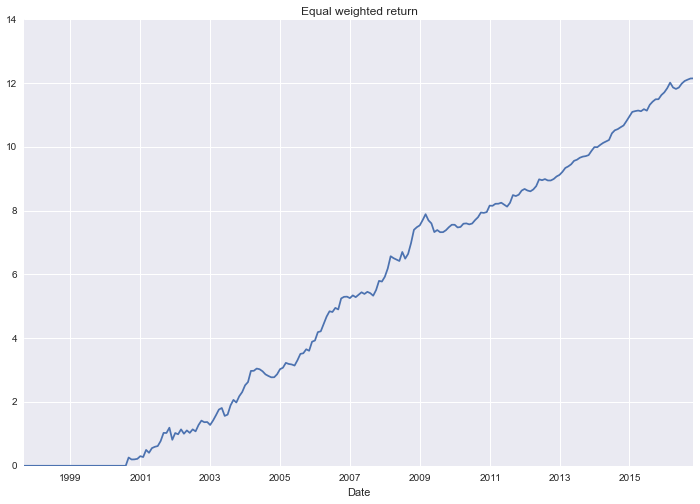

In [27]:
pos=tsmom(data,12)
pnl=calc_pnl(pos,data)
sr=calc_Sharpe(pnl)
ew_portfolio_pnl(pnl).cumsum().plot(title='Equal weighted return')

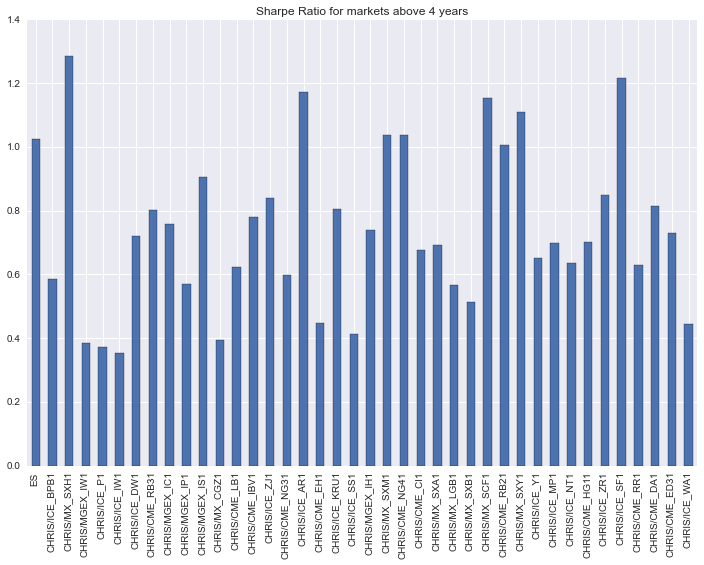

In [9]:
sr.loc[data.count()>48].plot(kind='bar',title='Sharpe Ratio for markets above 4 years')

In [10]:
volume = pd.DataFrame()
for i in sr.loc[data.count()>48].index:
    try:
        volume[i]=quandl.get(i, authtoken=token).Volume
    except:
        print i

ES


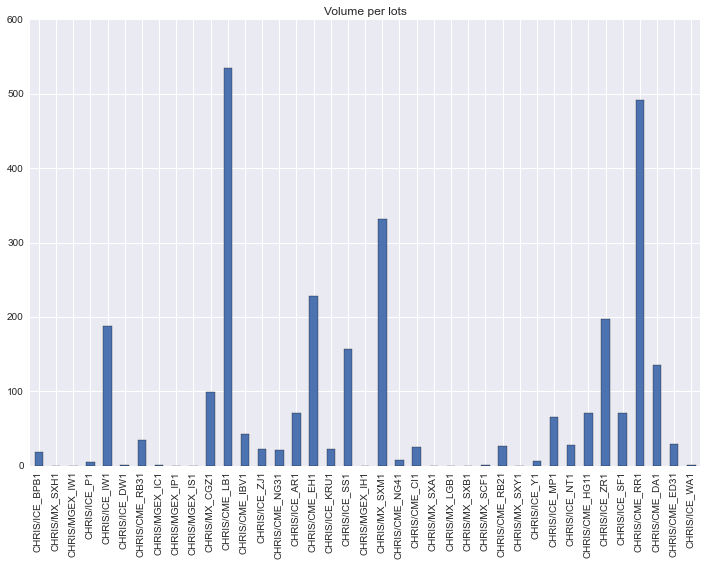

In [11]:
volume.mean().plot(kind='bar', title='Volume per lots')

In [17]:
df=pd.DataFrame()
df['Volume']=volume.mean()
df['SR']=sr

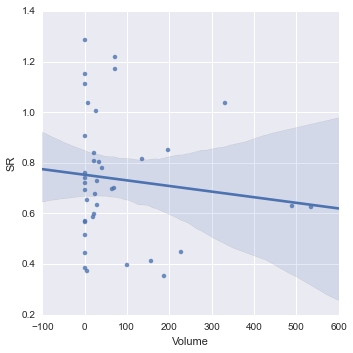

In [30]:
sns.lmplot('Volume','SR',df)